# 2. Vorhersage des Immobilienpreises (1/2)

Ziel dieser Teilaufgabe ist die Vorhersage des Preises (Attribut `PurchasePrice`).

Die Aufgabenstellung ist zwei Teilschritte gegliedert, die Verständnisgewinn und erfolgreiches Lösen der Aufgabenstellung unterstützen sollen:

# 2.1 Einfache lineare Regression und Residuenanalyse

Verwende ein einfaches lineares Modell zur Vorhersage von `price_cleaned` mit dem Attribut `Space extracted` oder `Floor_space_merged` (es gibt einige, wo beide fehlen (um die 800, können ignoriert werden).

Entwickle das Modell in einem Notebook. Untersuche dabei ob die Annahmen eines linearen Modells erfüllt sind mit geeigneten Darstellungen. Wie können Variablen-Transformationen verwendet werden, um die Modellvoraussetzungen besser zu erfüllen und das Modell zu verbessern?

Rapportiere und diskutiere die erreichte Genauigkeit der Vorhersage mit mehreren sinnvollen Metriken und auf unabhängigen Testdaten.

Abgabe

Notebook und daraus erstellter Bericht (ohne Code) als pdf.

In [61]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Import sklearn modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# load dataframm
df = pd.read_csv('../data/clean_gde.csv', usecols=["living_space", "floor_space", "price"])

# display df
df.head(2)

,living_space,floor_space,price
0,100.0,NaN,1150000.0
1,156.0,242.0,1420000.0


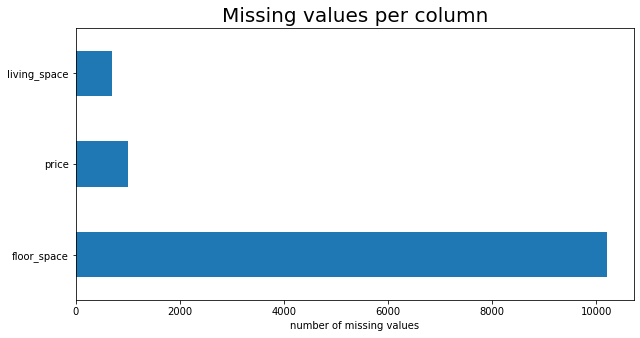

In [63]:
# Count missing values for each column, sort them and create barplot flipped
df.isnull().sum().sort_values(ascending=False).plot(kind='barh', figsize=(10, 5))
plt.title('Missing values per column', fontsize=20)
plt.xlabel("number of missing values")
plt.show()


# Simple Linear Regression with price vs. living_space

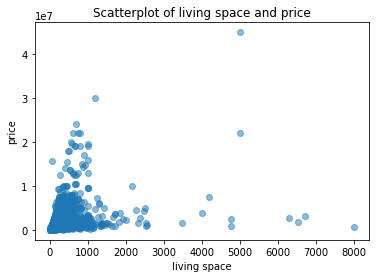

In [64]:
# Select interested cols
df_living_space_price = df[['living_space', 'price']]

# drop missing rows
df_living_space_price = df_living_space_price.dropna()

# create x and y variabels for regression
x = df_living_space_price['living_space'].values.reshape(-1, 1)
y = df_living_space_price['price'].values.reshape(-1, 1)

# visualize data with scatterplot
plt.scatter(x, y, alpha=0.5)
plt.title('Scatterplot of living space and price')
plt.xlabel('living space')
plt.ylabel('price')
plt.show()

In [65]:
# creating sklearn Linear Regression model
model = LinearRegression().fit(x, y)

# get the coefficient and intercept
print('Coefficient: ', model.coef_[0][0])
print('Intercept: ', model.intercept_[0])

# get the R2 score
print('R2 score: ', model.score(x, y))

Coefficient:  2561.093984747341
Intercept:  746205.8282811623
R2 score:  0.16946712129505614


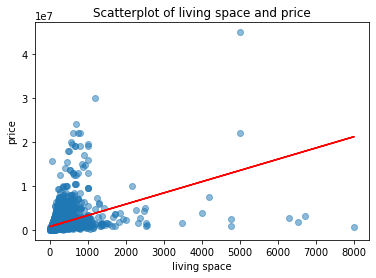

In [66]:
# Visualize the regression line 
plt.scatter(x, y, alpha=0.5)
plt.plot(x, model.predict(x), color='red')
plt.title('Scatterplot of living space and price')
plt.xlabel('living space')
plt.ylabel('price')
plt.show()

## Model
${price = 746206 * living space + 2561}$

gets us an R2 Score of: 0.1695

## Residuenanalyse

For the residueanalyse we are checking three conditions:
- The error shouldn’t be dependent
- The expected value should be around 0
- The residuals should follow normal distribution

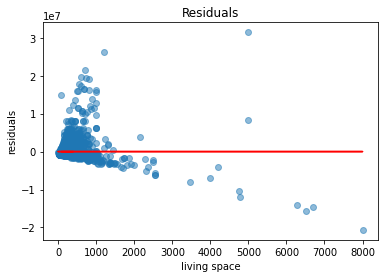

In [67]:
# calculte Residuals
residuals = y - model.predict(x)

# Checking first two condition with a residual scatterplot
plt.scatter(x, residuals, alpha=0.5)
plt.plot(x, 0 * x, color='red')
plt.title('Residuals')
plt.xlabel('living space')
plt.ylabel('residuals')
plt.show()

The resiudals are not independent. The values arent around 0.

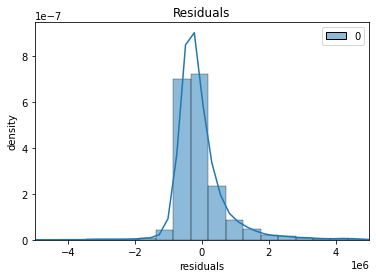

In [68]:
sns.histplot(residuals, kde=True, stat='density', bins=100)
plt.title('Residuals')
plt.xlabel('residuals')
plt.ylabel('density')
plt.xlim(-10000000/2, 10000000/2)
plt.show()


# Create a Linear Model function with residual analysis

In [74]:
# create the linear regression function with residual analysis
def linear_regression_residual(df:pd.DataFrame, xcol:str, ycol:str):
    '''
    This linear function uses the sklearn library and makes a simple linear regression with
    residual analysis. The function returns the coefficient, intercept, R2 score and the some standard
    visualizations.
    Important: The function only works with numerical values and no missing values.
    
    Parameters
    ----------
    df : pd.DataFrame
        The dataframe with the data.
    xcol : str
        The name of the column with the x values.
    ycol : str
        The name of the column with the y values.
    '''
    # drop missing rows
    df = df.dropna()
    
    # create x and y variabels for regression
    x = df[xcol].values.reshape(-1, 1)
    y = df[ycol].values.reshape(-1, 1)

    # visualize data with scatterplot
    plt.scatter(x, y, alpha=0.5)
    plt.title('Scatterplot of living space and price')
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.show()

    # creating sklearn Linear Regression model
    model = LinearRegression().fit(x, y)

    # get the coefficient and intercept
    print('Coefficient: ', model.coef_[0][0])
    print('Intercept: ', model.intercept_[0])

    # get the R2 score
    print('R2 score: ', model.score(x, y))

    # Visualize the regression line 
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x, model.predict(x), color='red')
    plt.title('Scatterplot of ' + xcol + " and " + ycol)
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.show()

    # calculte Residuals
    residuals = y - model.predict(x)

    # Checking first two condition with a residual scatterplot
    plt.scatter(x, residuals, alpha=0.5)
    plt.plot(x, 0 * x, color='red')
    plt.title('Residuals')
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.show()

    # check third residual condition with a histogram and denisty plot
    sns.histplot(residuals, kde=True, stat='density', bins=100)
    plt.title('Residuals')
    plt.xlabel('residuals')
    plt.ylabel('density')
    plt.xlim(-10000000/2, 10000000/2)
    plt.show()
